<a href="https://colab.research.google.com/github/cerqueirapedro/data_science/blob/master/An%C3%A1lide_de_Dados_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science**
*by [Pedro Cerqueira](https://www.linkedin.com/in/pedro-henrique-cerqueira/)*

---

# Airbnb data analytics and data visualization in Rio

<p align="center">
  <img  src="https://www.melhoresdestinos.com.br/wp-content/uploads/2015/11/Dicas-Airbnb.jpg">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.




## Importando Dados

Primeiro de tudo, precisamos importar nossas bibliotecas.

Existem quatro bibliotecas principais incorporadas para este projeto:

* **Pandas** - É o nosso gerente de canal. Ele faz todas as informações de estruturação e organização para você! É como ter um "organizador pessoal", mas com esteróides!
* **Matplotlib** - para plotar gráficos agradáveis e básicos.
* **Seaborn** - às vezes, os gráficos podem ser bastante chatos. Essa ferramenta nos ajuda a visualizar os dados de uma maneira mais elegante e agradável! Foi criado para ser gráficos estatísticos mais atraentes e informativos.
* **Folium** - Obtenha todos os dados e plote-os em um mapa interativo!

Para facilitar nosso trabalho, costumávamos escrever o nome da biblioteca em siglas, a seguir:

*   **Pandas** as pd
*   **Matplotlib** as plt
*   **Seaborn** as sns
*   **Folium** as folium (sim, ele não tem um nome curto para ele)


Portanto, use o comando **% matplotlib inline** para gerar a chamada para imprimir os gráficos em nossa tela posteriormente.


In [ ]:
# importando pacotes
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import folium;

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Agora, todas as bibliotecas são importadas, é hora de importar nossa listagem do Airbnb do Dataframe. A parte interessante desses dados é sua flexibilidade para atualizações. Qualquer nova entrada de dados na lista, então temos os valores alterados, nossos algoritmos funcionarão ao mesmo tempo. Portanto, não há necessidade de se preocupar com o upload de novos dados, pois todos os resultados exibidos sempre serão precisos no momento. Não é um código ruim para dados gratuitos e computação em nuvem!

In [ ]:
# import listings.csv from Airbnd url to this DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv");

#Data Analysis

Com os dados revelados e os comandos estão funcionando bem, podemos colocar os rótulos para cada variável do nosso quadro de dados importado. Além disso, é muito importante ter uma referência na qual você possa descobrir qual variável está relacionada a outras por dois motivos simples:
* 1- Para você: você nunca sabe quantas vezes precisa voltar para esse projeto.
* 2- Para os outros: as gerações futuras de profissionais podem trabalhar facilmente com seu conteúdo se você fornecer um caminho claro para ele. Afinal, a análise de dados não trata apenas de códigos e variáveis estranhas.

**Glossário para as variáveis**. Embora algumas variáveis sejam auto-explicativas, seguimos a regra "pelo livro".

* id - O ID da propriedade

* name - Nome dado à propriedade

* host_id - Proprietário da listagem

* host_name - Nome do proprietário

* neighbourhood_group - Geralmente circunda a cidade escolhida pela proximidade

* neighborhood - Nome dos Bairros

* latitude - Latitude da propriedade

* longitude - Longitude da propriedade

* room_type - Tipo do Imovel 

* price - Preço por Dia

* minimum_nights - Quantidade minimas de noite

* number_of_reviews - Comentários recebidos

* last_review -  data do último review

* reviews_per_month - Comentários recebidos por mês

* calculated_host_listings_count - número de listagens pertencentes ao mesmo ID

* availability_365 - disponibilidade ao longo do ano

Para mostrar as cinco primeiras entradas da sua listagem, use o comando "df.head ()", que os colchetes "()" vazios representam que a biblioteca obtém os 5 primeiros conjuntos de dados do seu quadro de dados.

In [ ]:
#Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


Diametricamente, é possível ver a ultimas entradas do seu quadro de dados.

In [ ]:
#show as últimas 5 entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35865,43222409,Suíte fenomenal em mansão de luxo,27531233,Tiago,NaN,Itanhangá,-22.98356,-43.30366,Private room,64,2,0,NaN,NaN,5,336
35866,43222788,Quarto Casal Individual ARPOADOR / IPANEMA,62913860,Rodolfo,NaN,Ipanema,-22.98526,-43.19385,Private room,68,28,0,NaN,NaN,1,365
35867,43222989,Perto da praia? Aqui mesmo. Copacabana!,128128458,Marcia E,NaN,Copacabana,-22.97516,-43.19261,Entire home/apt,248,3,0,NaN,NaN,2,69
35868,43223062,Loft confortável para sua estadia.,344170057,Viviane & Jefferson,NaN,Leme,-22.96379,-43.17193,Entire home/apt,121,2,0,NaN,NaN,1,270
35869,43227835,Quarto confortável ao lado da Jeunesse Arena,125684729,Gustavo,NaN,Barra da Tijuca,-22.97738,-43.37373,Private room,250,1,0,NaN,NaN,2,0


Portanto, se você me seguiu até aqui, deve se perguntar sobre os recursos desse quadro de dados, como o "número de variáveis", nomes, preços, etc.

### **Q1-Quantas entradas e variáveis nosso conjunto de dados possui e quais seus tipos?**

In [ ]:
# identifica o volume do conjunto de dados
print ("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 35870
Variáveis:	 16



In [ ]:
# Verifica os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2.Qual é a porcentagem de valores ausentes no conjunto de dados?**
O código para saber quais valores são **nulos**, você pode usar a função "isnull". Se o valor existir, ele mostra um zero; caso contrário, mostra um número binário igual a 1. Portanto, o número impresso na tabela representa a soma dos valores ausentes para cada variável.

In [ ]:
#Quais variáveis estão faltando?
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35865,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
35866,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
35867,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
35868,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False


Portanto, se a função "isnull" mostrar TRUE, significa que a variável NÃO existe. Se False, a variável existe. Eu sei que funciona uma interpretação bem oposta, mas a resposta está respondendo à pergunta feita pela variável nula (que na verdade não é zero porque "zero" ainda é um número, mas se os convidados preencheram essa informação no sistema).

In [ ]:
df.isnull().sum()

id                                    0
name                                 58
host_id                               0
host_name                             5
neighbourhood_group               35870
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14766
reviews_per_month                 14766
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*Agora*, traduzindo-o em porcentagem, dividimos a variável pelo número total da população, que neste caso é o comando *shape[0]*.

In [ ]:
((df.isnull().sum()/df.shape[0])*100)

id                                  0.000000
name                                0.161695
host_id                             0.000000
host_name                           0.013939
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        41.165319
reviews_per_month                  41.165319
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

Portanto, após os resultados das porcentagens para cada variável, devemos organizar a tabela de forma ascendente. Podemos ver que o grupo do bairro tem 100% do valor que falta. Além disso, as revisões por mês e a última revisão representam 41,16% dos valores ausentes.

In [ ]:
# classifica em ordem decrescente as variáveis pelos seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  41.165319
last_review                        41.165319
name                                0.161695
host_name                           0.013939
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Com base nos resultados, podemos inferir o seguinte:

* A coluna neighbourhood_group não possui nenhum valor. Portanto, é igual a 100%.
* As colunas reviews_per_month e last_review têm a mesma porcentagem. Isso significa que o número de revisões pode ser a última revisão para cada conta de ID.
* Todos os outros parâmetros têm seus valores preenchidos.

Além disso, se prestarmos atenção ao grupo "Tail" em nossa tabela impressa anteriormente, há alguns número_de_reviews com o valor "Zero". No entanto, o comando isnull não mostrou que esse campo ainda está preenchido com um valor, mesmo que seja um zero. Portanto, para ter uma quantidade total de propriedades sem nenhuma revisão, devemos procurar o número de zeros nesta coluna em particular.

In [ ]:
#Verifique a quantidade de linhas com o valor Zero em 'number_of_reviews'
(df.number_of_reviews == 0).sum()


14766

In [ ]:
#Valor em %
((df.number_of_reviews == 0).sum())/(df.shape[0])*100

41.16531920825202

Agora, sabemos que existe a mesma quantidade de 14766 propriedades em 35870 ou 41,16% com propriedades com reviews_per_month, last_review e number_of_reviews. Nosso melhor palpite é que essas propriedades nunca foram alugadas ou são novas na listagem, portanto não tiveram tempo de ganhar confiança no mercado para poder crescer no número de avaliações. Outra visão é que as propriedades estão vazias no momento por causa da Pandemia COVID19. Tinha sido um efeito maciço nos níveis de ocupação para esse tipo de negócio.

### **Q3. Distribuição Variável**
Agora podemos ver uma variedade de histogramas para analisar a distribuição de cada variável e ajudar no processo de filtragem de outliers.

O comando principal aqui será:

* hist: a parte do histograma, é claro
* bins: as barras em cada gráfico
* figsize: o tamanho de cada figura / gráfico.

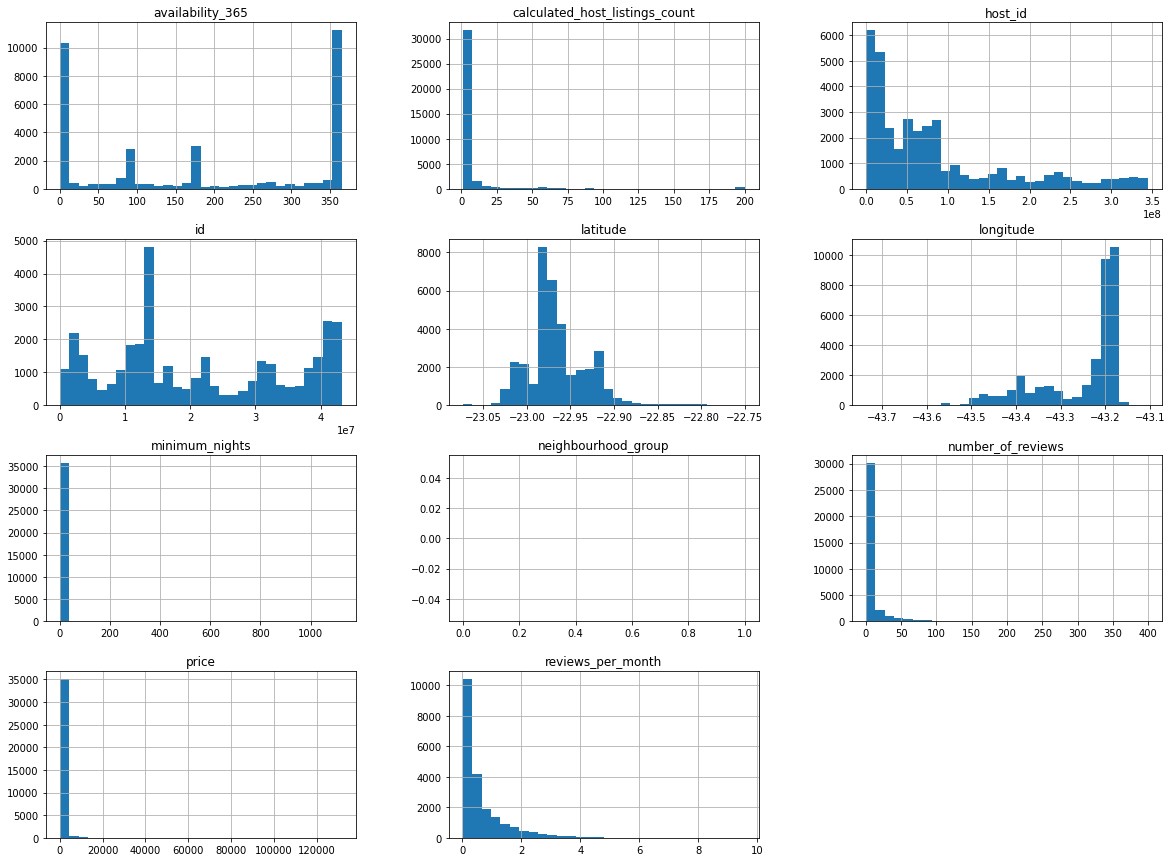

In [ ]:
# histograma plotado para todas as variáveis
df.hist(bins = 30, figsize = (20, 15));

### **Q4. Existem outliers?**

In [ ]:
# imprime a média e as estatísticas das colunas especificadas
df[['price', 'minimum_nights', 'availability_365']].describe()

,price,minimum_nights,availability_365
count,35870.000000,35870.000000,35870.000000
mean,753.686367,4.781851,180.371815
std,2229.366334,22.471085,152.510778
min,0.000000,1.000000,0.000000
25%,158.000000,1.000000,0.000000
50%,298.000000,2.000000,178.000000
75%,632.000000,4.000000,363.000000
max,131727.000000,1123.000000,365.000000


In [ ]:
#Adiciona o valor de 1%
df[['price', 'minimum_nights', 'availability_365']].describe(percentiles=[.01, .25, .5, .75])

,price,minimum_nights,availability_365
count,35870.000000,35870.000000,35870.000000
mean,753.686367,4.781851,180.371815
std,2229.366334,22.471085,152.510778
min,0.000000,1.000000,0.000000
1%,48.000000,1.000000,0.000000
25%,158.000000,1.000000,0.000000
50%,298.000000,2.000000,178.000000
75%,632.000000,4.000000,363.000000
max,131727.000000,1123.000000,365.000000


#### Boxplot para price

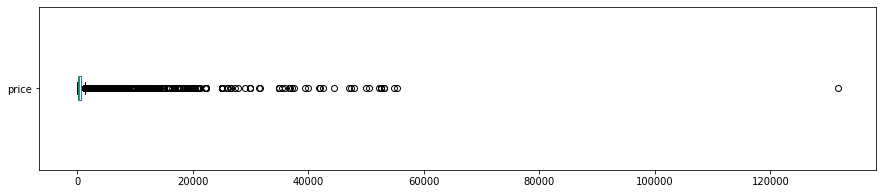

Preço | valores acima de R$1500:
3360 entradas
9.3672%


In [ ]:
#price
df.price.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de R$1500 para price
print("Preço | valores acima de R$1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Boxplot para noites mínimas

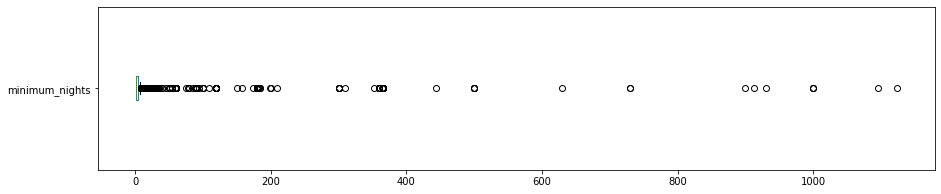

minimum_nights | valores acima de 30:
224 entradas
0.6245%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind= 'box', vert=False, figsize=(15, 3))
plt.show()

#veja a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights | valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Não obstante, podemos constatar que apenas 9,36% da coluna de preços está acima de R $ 1500 e apenas "0,62%" dos valores da coluna minimum_nights acima de 30 dias. Além disso, sabemos que 75% dos dados estão abaixo de 632 reais e 4 noites mínimas de estadia. Levando isso em consideração, é razoável perder essas informações para ter uma abordagem mais realista no cálculo.

Portanto, criaremos um novo quadro de dados, *df_clean*, que contém o seguinte:
* As linhas de preço estarão entre 0 e 1500;
* As noites mínimas não são superiores a 30;

Depois disso, com esse novo quadro de dados criado, podemos as colunas reviews_per_month e last_review, como dissemos anteriormente nos projetos, que são a mesma porcentagem dos parâmetros de outras revisões.

Por último, mas não menos importante, os próximos histogramas podem parecer melhores.

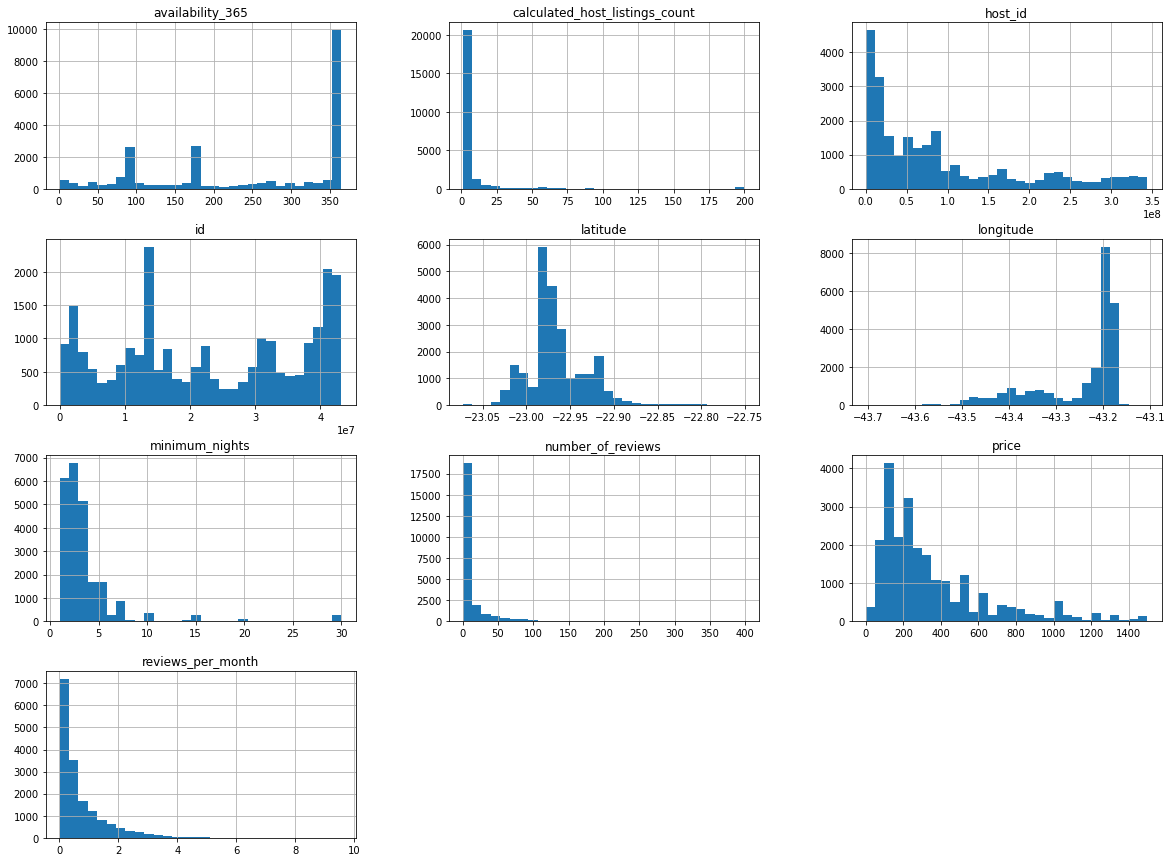

In [ ]:
df_clean = df.copy()
# Retirando valores acima de R$1500
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)

# Retirando valores acima de 30 da coluna 'minimum_nights'
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Exclua os valores "Zero" da coluna 'availability_365'
df_clean.drop(df_clean[df_clean.availability_365 == 0].index, axis=0, inplace=True)

# Excluir coluna 'neighbourhood_group' 
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis limpas
df_clean.hist(bins=30, figsize=(20,15));

Agora, podemos ver que o preço parece mais realista, semelhante a uma curva em forma de sino. O número de noites mínimas se concentra mais no intervalo entre 1 e 3 dias, mergulhando 4 dias em diante. Existem dois pequenos "inchaços" que podem representar os aluguéis por 15 e 30 dias, respectivamente. Uma explicação plausível é que essas áreas estão relacionadas às reservas da empresa para economizar mais dinheiro alocando grupos de contratantes em casas inteiras, em vez de na indústria hoteleira.

Além disso, a disponibilidade mostra que a mais variável é ao longo do ano. Antes da limpeza dos outliers, não era possível identificá-lo.

A seguir, analisaremos se existe alguma correlação entre a variável, executando um mapa de calor para melhor visualização.

### **Q5. Qual é a correlação de dados?**

In [ ]:

corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# Plot the Matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.137561,-0.153093,-0.157750,0.075121,0.112730
minimum_nights,0.137561,1.000000,-0.061182,-0.091522,-0.032893,0.007554
number_of_reviews,-0.153093,-0.061182,1.000000,0.639345,-0.046345,-0.082382
reviews_per_month,-0.157750,-0.091522,0.639345,1.000000,-0.036169,-0.182886
calculated_host_listings_count,0.075121,-0.032893,-0.046345,-0.036169,1.000000,-0.001665
availability_365,0.112730,0.007554,-0.082382,-0.182886,-0.001665,1.000000


Em seguida, podemos usar nossa biblioteca Seaborn para traçar um mapa de calor.

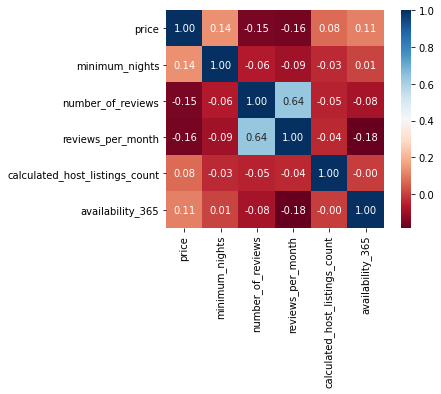

In [ ]:
# Plot the Heatmap from the correlation matrix
sns.heatmap(corr, cmap= 'RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Que tipo de lugar as pessoas estão procurando?**

In [ ]:
#tipos de quartos, local inteiro ou compartilhado

df_clean.room_type.value_counts()

Entire home/apt    16524
Private room        6579
Shared room          621
Hotel room           136
Name: room_type, dtype: int64

In [ ]:
# Percentual
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    69.253982
Private room       27.573345
Shared room         2.602682
Hotel room          0.569992
Name: room_type, dtype: float64

In [ ]:
# Noite mínima de acordo com o local

df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending = False)

room_type
Entire home/apt    3.679073
Shared room        2.888889
Private room       2.667123
Hotel room         1.764706
Name: minimum_nights, dtype: float64

Os dados mostram que 69% das pessoas preferem reservar um local inteiro (Entire) para si, sendo 27% em salas privadas (Private room). O outro tipo de local é muito raro e incomum.

Além disso, nas noites mínimas, podemos detalhar como a seguir, lembrando que a noite é um número inteiro.


* Casa / apto inteiro: 4 dias
* Quarto de hotel: 2 dias
* Quarto inteiro: 3 dias
* Quarto compartilhado: 3 dias

### **Q7. Onde é o lugar mais caro?**



Para se ter noção dos valores por bairros iremos agrupar a media de preço pelos mesmos.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Vaz Lobo                  813.50
Engenheiro Leal           800.00
Osvaldo Cruz              637.00
Ricardo de Albuquerque    620.75
Paciência                 577.00
                           ...  
Jardim América             69.00
Vila Militar               69.00
Honório Gurgel             64.00
Gericinó                   53.00
Galeão                     53.00
Name: price, Length: 152, dtype: float64

## Está certo Vaz Lobo em primeiro lugar, junto com Engenheiro Leal e Osvaldo Cruz?

In [ ]:
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


Não, ao verificarmos Vaz Lobo por exemplo, conseguimos identificar somente o cadastro de 2 unidades, além de que quem conhece o RIO de Janeiro sabe que a probabilidade de Vaz Lobo ser mais caro que Leblon, Copacabana, Guaruja... É quase impossivel, isso nos mostra a necessidade de termos conhecimento básico acerca dos dados que iremos analisar.


Dessa forma afim de que nossa análise de aproxime mais da realidade podemos seguir os seguintes passos:

#### Listar os 10 primeiros bairros com mais unidades

In [ ]:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:10]

Copacabana                  7048
Barra da Tijuca             2410
Ipanema                     2169
Jacarepaguá                 1232
Botafogo                    1107
Recreio dos Bandeirantes    1058
Leblon                      1013
Santa Teresa                 810
Centro                       716
Flamengo                     548
Name: neighbourhood, dtype: int64

#### Listar os 10 primeiros bairros com mais recomendação

In [ ]:
# obtendo o total de reviews por localidade
total_reviews_localidades = df_clean.groupby('neighbourhood')['number_of_reviews'].sum()

# Pegando as 10 localidades recomendadas
top10_recomendados = total_reviews_localidades.sort_values(ascending=False)[:10]

top10_recomendados

neighbourhood
Copacabana                  125102
Ipanema                      51213
Barra da Tijuca              26693
Leblon                       19425
Botafogo                     13576
Centro                        9955
Santa Teresa                  9887
Jacarepaguá                   6866
Leme                          6718
Recreio dos Bandeirantes      6248
Name: number_of_reviews, dtype: int64

#### Listar os 10 primeiros bairros com maior valor somado do preço de cada unidade

In [ ]:
localidades_valores_mais_altos = df_clean.groupby('neighbourhood')['price'].sum().sort_values(ascending=False)[:10]
localidades_valores_mais_altos

neighbourhood
Copacabana                  2304066
Barra da Tijuca             1045027
Ipanema                      959041
Jacarepaguá                  510104
Leblon                       467450
Recreio dos Bandeirantes     446432
Botafogo                     312326
Santa Teresa                 197214
Centro                       163826
Leme                         154757
Name: price, dtype: int64

Em seguida, faremos uma correlação dessas 3 listas em uma nova tabela onde o index séra os bairros...

O bairro que estiver presente em uma lista recebera o valor 1, portando o que tiver maior valor recebera um grau de credibilidade maior, o valor máximo que um bairro pode atingir são 3.

In [ ]:
# lista
dados_lista = [[ 1, 1, 1, 3, 433.62],
               [ 1, 1, 1, 3, 282.14],
               [ 0, 1, 1, 2, 228.81],
               [ 1, 1, 1, 3, 326.91],
               [ 1, 0, 0, 1, 273.81],
               [ 1, 1, 1, 3, 442.16],
               [ 1, 1, 1, 3, 414.05],
               [ 1, 1, 1, 3, 461.45],
               [ 0, 1, 1, 2, 347.77],
               [ 1, 1, 1, 3, 421.96],
               [ 1, 1, 1, 3, 243.47]]
# criar DataFrame
mini_data = pd.DataFrame(dados_lista, columns=['Lista_de_Unidades', 'Lista_de_Recomendação', 'Lista_soma_de_valores', 'Grau_de_Credibilidade', 'Preco_Medio'])
mini_data.index = ['Barra da Tijuca', 'Botafogo', 'Centro', 'Copacabana', 'Flamengo', 'Ipanema', 'Jacarepaguá', 'Leblon', 'Leme', 'Recreio dos Bandeirantes', 'Santa Teresa']

Afim de que o código não se torne poluído, irei apenas demonstrar o codigo da média de preços do bairro de Copacabana, porém sinta se a vontade para conferir o resto, basta substituir o nome "Copacabana" pelo nome do bairro que deseja conferir.

Ps: As médias dos demais bairros já constão na tabela abaixo.

In [ ]:
# ver as médias dos bairros alterando somente o nome
round(df_clean[df_clean.neighbourhood == "Copacabana"].price.mean(), 2)

326.91

In [ ]:
# ver a média dos imoveis como um todo
round(df_clean.price.mean(), 2)

352.78

In [ ]:
# Visualizando o DataFrame
mini_data

,Lista_de_Unidades,Lista_de_Recomendação,Lista_soma_de_valores,Grau_de_Credibilidade,Preco_Medio
Barra da Tijuca,1,1,1,3,433.62
Botafogo,1,1,1,3,282.14
Centro,0,1,1,2,228.81
Copacabana,1,1,1,3,326.91
Flamengo,1,0,0,1,273.81
Ipanema,1,1,1,3,442.16
Jacarepaguá,1,1,1,3,414.05
Leblon,1,1,1,3,461.45
Leme,0,1,1,2,347.77
Recreio dos Bandeirantes,1,1,1,3,421.96


In [ ]:
#Em ordem decrescente os bairros com maior média de preço
mini_data.Preco_Medio.sort_values(ascending=False)[:11]

Leblon                      461.45
Ipanema                     442.16
Barra da Tijuca             433.62
Recreio dos Bandeirantes    421.96
Jacarepaguá                 414.05
Leme                        347.77
Copacabana                  326.91
Botafogo                    282.14
Flamengo                    273.81
Santa Teresa                243.47
Centro                      228.81
Name: Preco_Medio, dtype: float64

In [ ]:
media_top3 = round((461.45 + 442.16 + 433.62) / 3, 2)
media_top3

445.74

In [ ]:
#Média dos Top 3 bairros mais caros
media_custo_beneficio = round((282.14 + 273.81 + 228.81) / 3, 2)
media_custo_beneficio

261.59

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.


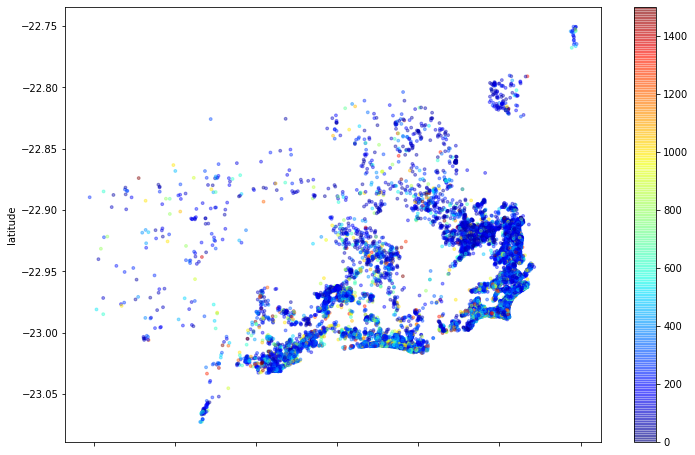

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

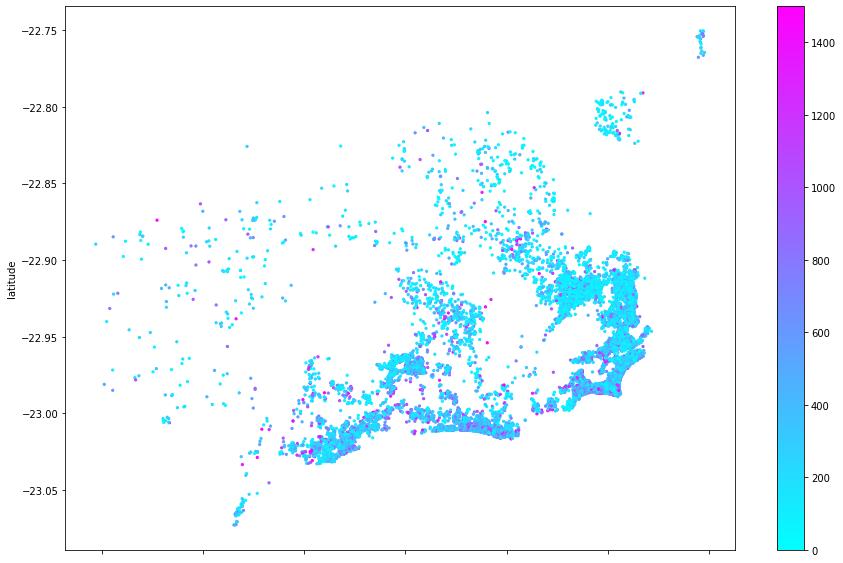

In [ ]:
# Map plot using the latitute and the logitude.
df_clean.plot(kind="scatter", x='longitude', y='latitude', s=5, c = df_clean['price'], cmap='cool', figsize=(15,10));

In [ ]:
map_cam = folium.Map
map_cam = folium.Map(location=[-22.970722, -43.182365], min_zoom=13, width = '80%', height = '80%')

map_cam

## Conclusão
Finalmente chegamos ao final de nossa breve análise de dados do Airbnb no Rio de Janeiro. Durante o projeto, realizamos algumas análises interessantes dos dados do Airbnb do Rio, respondendo a muitas perguntas que antes não podíamos responder. Como exemplos, algumas perguntas respondidas foram:

* Que tipo de lugar é mais comum para o uso do Airbnb no Rio de Janeiro?
* Qual é a diferença de preço entre os diferentes tipos de quartos?
* Quais são as regiões mais caras para ficar no Rio?
* É possível reservar um lugar no Airbnb no Rio a qualquer período do ano?

Também pudemos ver como usar o Python pode ir de um arquivo de texto para um mapa interativo completo, carregado periodicamente.

Para atingir esses objetivos, passamos por importantes etapas de manipulação de dados, como explorar, limpar, analisar e visualizar dados.

Em resumo, as conclusões deste projeto são:

* Quartos privados e apartamentos inteiros são os tipos de acomodações mais comuns no Airbnb do Rio;
* Quartos de hotel e quartos compartilhados são muito dificeis de serem encontrados;
* Geralmente, Rio se encaixa em todos os bolsos, sendo os lugares mais caros da cidade, Leblon, Ipanema e Barra da Tijuca a uma taxa diária média entre os 3 de R$ 445 ou mais e no caso dos preços médios de outros bairros em relação a custo benefício os indicados segundo o portal [Vida Cigana](https://vidacigana.com/onde-ficar-no-rio-de-janeiro/) foram Botafogo, Flamengo e Centro, a média dos três bairros juntos é de 261 reais.
* Não é de surpreender que a maioria das listagens do Airbnb no Rio funcione todos os 365 dias do ano.